<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab5_Manhattan_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving with Misplaced Tiles Heuristic...
Solution found using Misplaced Tiles:
- Number of moves: 2
- Nodes explored: 3

Visualizing the solution for Misplaced Tiles...



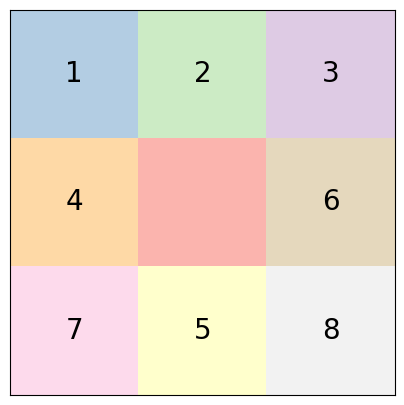

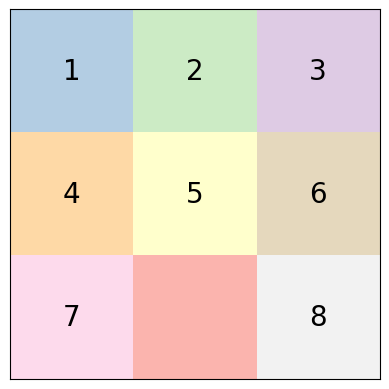

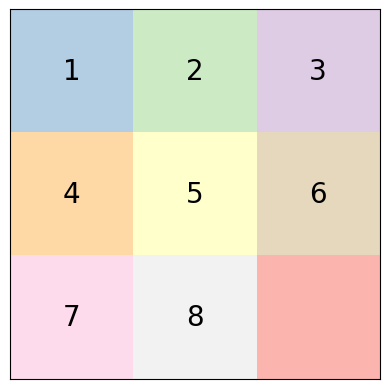

<Figure size 640x480 with 0 Axes>

Solving with Manhattan Distance Heuristic...
Solution found using Manhattan Distance:
- Number of moves: 2
- Nodes explored: 3

Visualizing the solution for Manhattan Distance...



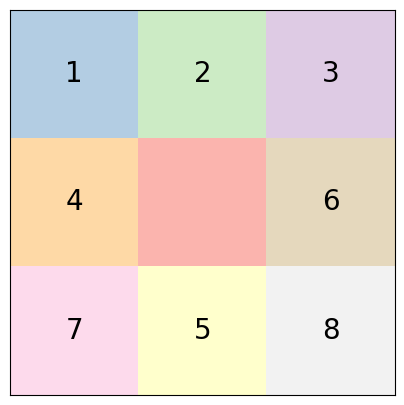

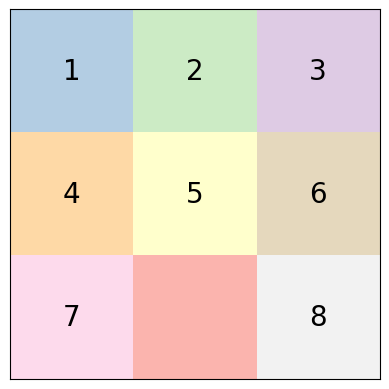

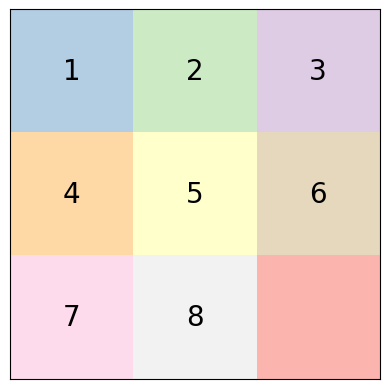

<Figure size 640x480 with 0 Axes>

Heuristic Comparison:
Misplaced Tiles - Moves: 2, Nodes Explored: 3
Manhattan Distance - Moves: 2, Nodes Explored: 3


In [5]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import time

class PuzzleState:
    def __init__(self, board, parent=None, move="", cost=0, heuristic=0):
        self.board = board
        self.parent = parent
        self.move = move
        self.cost = cost
        self.heuristic = heuristic
        self.total_cost = cost + heuristic

    def __lt__(self, other):
        return self.total_cost < other.total_cost

def get_goal_state():
    return np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

def is_goal(state):
    return np.array_equal(state.board, get_goal_state())

def manhattan_distance(state):
    """Calculate the sum of Manhattan distances for each tile."""
    goal = get_goal_state()
    distance = 0
    for i in range(1, 9):  # Ignore 0 (blank space)
        current_pos = np.argwhere(state.board == i)[0]
        goal_pos = np.argwhere(goal == i)[0]
        distance += abs(current_pos[0] - goal_pos[0]) + abs(current_pos[1] - goal_pos[1])
    return distance

def misplaced_tiles(state):
    """Calculate the number of misplaced tiles."""
    goal = get_goal_state()
    return np.sum(state.board != goal) - 1  # Subtract 1 for the blank tile (0)

def get_neighbors(state):
    """Generate all possible neighbor states by sliding the blank tile."""
    neighbors = []
    board = state.board
    x, y = np.argwhere(board == 0)[0]  # Find the blank tile position
    moves = [(x-1, y, "Up"), (x+1, y, "Down"), (x, y-1, "Left"), (x, y+1, "Right")]

    for nx, ny, move in moves:
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_board = board.copy()
            new_board[x, y], new_board[nx, ny] = new_board[nx, ny], new_board[x, y]
            neighbors.append(PuzzleState(new_board, state, move, state.cost + 1))
    return neighbors

def a_star(initial_board, heuristic_func):
    """A* search algorithm for solving the 8-puzzle."""
    initial_state = PuzzleState(initial_board, heuristic=heuristic_func(PuzzleState(initial_board)))
    open_list = []
    heapq.heappush(open_list, initial_state)
    explored = set()
    nodes_explored = 0

    while open_list:
        current_state = heapq.heappop(open_list)
        nodes_explored += 1

        if is_goal(current_state):
            return current_state, nodes_explored

        explored.add(current_state.board.tobytes())

        for neighbor in get_neighbors(current_state):
            if neighbor.board.tobytes() not in explored:
                neighbor.heuristic = heuristic_func(neighbor)
                neighbor.total_cost = neighbor.cost + neighbor.heuristic
                heapq.heappush(open_list, neighbor)

    return None, nodes_explored  # No solution found

def extract_solution(state):
    """Extract the sequence of moves from the initial state to the goal state."""
    solution = []
    while state.parent:
        solution.append(state.move)
        state = state.parent
    return solution[::-1]

def visualize_puzzle(state):
    """Visualize the current state of the puzzle."""
    plt.imshow(state.board, cmap='Pastel1', interpolation='none')
    for i in range(3):
        for j in range(3):
            if state.board[i, j] != 0:
                plt.text(j, i, str(state.board[i, j]), ha='center', va='center', fontsize=20, color='black')
    plt.xticks([])
    plt.yticks([])
    plt.pause(0.5)  # Pause for half a second to simulate animation
    plt.clf()

def show_solution_path(solution):
    """Visualize each step in the solution."""
    states = []
    while solution:
        states.append(solution)
        solution = solution.parent
    states.reverse()  # Reverse to show from initial state to goal state

    plt.figure(figsize=(5, 5))
    for state in states:
        visualize_puzzle(state)
    plt.show()

def solve_and_visualize(initial_board, heuristic_func, heuristic_name):
    """Solve the puzzle and visualize the solution."""
    print(f"Solving with {heuristic_name} Heuristic...")
    solution, nodes = a_star(initial_board, heuristic_func)
    moves = extract_solution(solution)
    print(f"Solution found using {heuristic_name}:")
    print(f"- Number of moves: {len(moves)}")
    print(f"- Nodes explored: {nodes}\n")

    print(f"Visualizing the solution for {heuristic_name}...\n")
    show_solution_path(solution)
    return len(moves), nodes

if __name__ == "__main__":
    initial_board = np.array([[1, 2, 3], [4, 0, 6], [7, 5, 8]])  # Change this for different puzzles

    # Solve with both heuristics and compare
    moves_h1, nodes_h1 = solve_and_visualize(initial_board, misplaced_tiles, "Misplaced Tiles")
    moves_h2, nodes_h2 = solve_and_visualize(initial_board, manhattan_distance, "Manhattan Distance")

    # Print Comparison
    print("Heuristic Comparison:")
    print(f"Misplaced Tiles - Moves: {moves_h1}, Nodes Explored: {nodes_h1}")
    print(f"Manhattan Distance - Moves: {moves_h2}, Nodes Explored: {nodes_h2}")
